In [102]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import os

print(os.getcwd()) 
original_path = os.getcwd() + "/generated_graphs/ER_n25_p0.15_graph_1.gexf"
G = nx.read_gexf(original_path)
total_sources = 2
total_obv = 4
diameter = nx.diameter(G)
print(nx.diameter(G))

c:\Users\parva\OneDrive\Desktop\BTP-parva\btp_result_generation\codes\tester_random_visual
5


In [104]:
def label_sources_and_observers(graph, n):
    total_nodes = list(graph.nodes)

    if n > len(total_nodes):
        raise ValueError("Not enough unique nodes in the graph to assign sources and observers.")

    # Randomly sample unique source and observer nodes
    source_nodes = set(random.sample(total_nodes, n))

    # Apply labels to the graph
    for node in source_nodes:
        graph.nodes[node]['label'] = 'source_nodes'


    print(f"Labeled {n} source_nodes.")
    return graph, source_nodes

In [105]:

G, sources = label_sources_and_observers(G, total_sources)
# source_nodes.clear()
# observers.clear()
# print(source_nodes)
# print(observers)



Labeled 2 source_nodes.


In [106]:
source_nodes = [n for n, d in G.nodes(data=True) if d.get('label') == 'source_nodes']


print(source_nodes)


['9', '21']


Code without reserve state


In [107]:
# from collections import defaultdict
# lbl = {}
# path = {}
# my_dict = defaultdict(list)


# # Assign states to nodes: +1 for infected, -1 for susceptible
# for node in G.nodes:
#     G.nodes[node]['state'] = -1  # Susceptible
#     G.nodes[node]['prev_State'] = 0
#     G.nodes[node]['infection_time'] = -1  # Default label for uninfected
#     G.nodes[node]['obv'] = 0
#     lbl[node] = -1  # Default label -1
#     path[node] = node

# for source in source_nodes:
#     G.nodes[source]['state'] = 1
#     G.nodes[source]['infection_time'] = 0  # Infected at t=0

# # for obv in observers:
# #     G.nodes[obv]['obv'] = 1

# # Infection spread function
# def spread_infection(G, infection_rate, steps=5):
#     for t in range(1, steps + 1):
#         new_infections = []
#         for node in G.nodes:
#             if G.nodes[node]['state'] == 1:
#                 for neighbor in G.neighbors(node):
#                     if G.nodes[neighbor]['state'] == -1:
#                         if np.random.rand() < infection_rate:
#                             path[neighbor] = node
#                             new_infections.append(neighbor)
#         for ni in new_infections:
#             G.nodes[ni]['state'] = 1
#             G.nodes[ni]['infection_time'] = t  # Record time of infection

# # Simulate infection spread
# spread_infection(G, infection_rate=0.3, steps=10)



In [108]:
# # Assign labels after infection simulation
# for node in G.nodes:
#     if G.nodes[node]['infection_time'] != -1:
#         lbl[node] = G.nodes[node]['infection_time']
#     else:
#         lbl[node] = -1  # Not infected

# # Print final labels

# cnt = 0
# temp3 = 10000000
# while(temp3 > 0):
#   for node in G.nodes:
#     my_dict[node].append(G.nodes[node]['state'])
#   for node in G.nodes:
#     if(G.nodes[node]['obv'] == 0):
#       if(G.nodes[node]['infection_time'] != -1):
#         cnt = 0
#         for neighbor in G.neighbors(node):
#           if(G.nodes[neighbor]['infection_time'] != -1):
#             cnt += 1
#         for neighbor in G.neighbors(node):
#           if(G.nodes[neighbor]['infection_time'] != -1 and cnt > 0):
#             G.nodes[neighbor]['state'] += G.nodes[node]['state']/cnt
#             my_dict[neighbor].append(G.nodes[neighbor]['state'])
#         if(cnt > 0):
#           G.nodes[node]['state'] = 0
#           my_dict[neighbor].append(G.nodes[neighbor]['state'])
#     else:
#       if(G.nodes[node]['infection_time'] != -1):
#         cnt = 0
#         for neighbor in G.neighbors(node):
#           if(G.nodes[neighbor]['infection_time'] != -1 and G.nodes[neighbor]['infection_time'] < G.nodes[node]['infection_time']):
#             cnt += 1
#         for neighbor in G.neighbors(node):
#           if(G.nodes[neighbor]['infection_time'] != -1 and G.nodes[neighbor]['infection_time'] < G.nodes[node]['infection_time'] and cnt > 0):
#             G.nodes[neighbor]['state'] += G.nodes[node]['state']/cnt
#             my_dict[neighbor].append(G.nodes[neighbor]['state'])
#         if(cnt > 0):
#           G.nodes[node]['state'] = 0
#           my_dict[neighbor].append(G.nodes[neighbor]['state'])
#     temp3-=1


# for node in G.nodes:
#     print(node , " " , " node " ,G.nodes[node]['state'], " state ", G.nodes[node]['infection_time'], " ", " time ")


# for node in G.nodes:
#   average = sum(my_dict[node]) / len(my_dict[node])
#   print(node, " node " , average, " average ")

# # Optional: visualize infected vs uninfected
# plt.figure(figsize=(8, 5))
# pos = nx.spring_layout(G, seed=42)
# node_colors = ['red' if lbl[n] != -1 else 'skyblue' for n in G.nodes]
# nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10)
# plt.title("Infected (red) vs Uninfected (blue) Nodes")
# plt.show()


code with reserve state


In [109]:
from collections import defaultdict
lbl = {}
path = {}
my_dict = defaultdict(list)
my_dict2 = defaultdict(list)


# Assign states to nodes: +1 for infected, -1 for susceptible
for node in G.nodes:
    G.nodes[node]['state'] = -1  # Susceptible
    G.nodes[node]['reserve_state'] = 0
    G.nodes[node]['prev_State'] = 0
    G.nodes[node]['infection_time'] = -1  # Default label for uninfected
    G.nodes[node]['obv'] = 0
    lbl[node] = -1  # Default label -1
    path[node] = node

for source in source_nodes:
    G.nodes[source]['state'] = 1
    G.nodes[source]['infection_time'] = 0  # Infected at t=0



# Infection spread function
def spread_infection(G, infection_rate, steps):
    for t in range(1, steps + 1):
        new_infections = []
        for node in G.nodes:
            if G.nodes[node]['state'] == 1:
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state'] == -1:
                        if np.random.rand() < infection_rate:
                            path[neighbor] = node
                            new_infections.append(neighbor)
        for ni in new_infections:
            G.nodes[ni]['state'] = 1
            G.nodes[ni]['infection_time'] = t  # Record time of infection

# Simulate infection spread
spread_infection(G, infection_rate=0.4, steps=6)



In [110]:
def label_observers(graph, sources, k):
    # Get all infected nodes that are not source nodes
    infected_non_sources = [
        node for node in graph.nodes
        if graph.nodes[node]['state'] == 1 and node not in sources
    ]

    if k > len(infected_non_sources):
        raise ValueError("Not enough infected non-source nodes to assign as observers.")

    observer_nodes = set(random.sample(infected_non_sources, k))

    # Label observer nodes
    for node in observer_nodes:
        graph.nodes[node]['label'] = 'observers'
        graph.nodes[node]['obv'] = 1  # Also mark for obv flag if needed

    print(f"Labeled {k} observer nodes.")
    return observer_nodes

# Example: Select and label 3 observers
observers = label_observers(G, source_nodes, total_obv)
print(type(observers))
observer_list = list(observers)
print(observer_list)

# observer_list = ['0' , '24']
# observers = {'0' , '24'}

Labeled 4 observer nodes.
<class 'set'>
['24', '13', '20', '15']


In [111]:
for obv in observers:
    G.nodes[obv]['obv'] = 1

0    node  0.0004992976013936686  state  3    time 
1    node  0.0003775292918886609  state  4    time 
2    node  0.00043808309358142465  state  4    time 
3    node  0.0002640874081137744  state  5    time 
4    node  0  state  6    time 
5    node  0.00010963415446346665  state  6    time 
6    node  -1  state  -1    time 
7    node  -1  state  -1    time 
8    node  0.00032844678628702933  state  3    time 
9    node  0  state  0    time 
10    node  0  state  4    time 
11    node  0  state  2    time 
12    node  0.00042302016147319156  state  6    time 
13    node  0.00037531714752157786  state  1    time 
14    node  0.0001271976889392475  state  5    time 
15    node  0.00020505682665920163  state  5    time 
16    node  -1  state  -1    time 
17    node  0.000469144234772976  state  3    time 
18    node  0.0002308158389190595  state  4    time 
19    node  0.00014069744848594672  state  5    time 
20    node  0  state  6    time 
21    node  0.00014069744848594672  state  0 

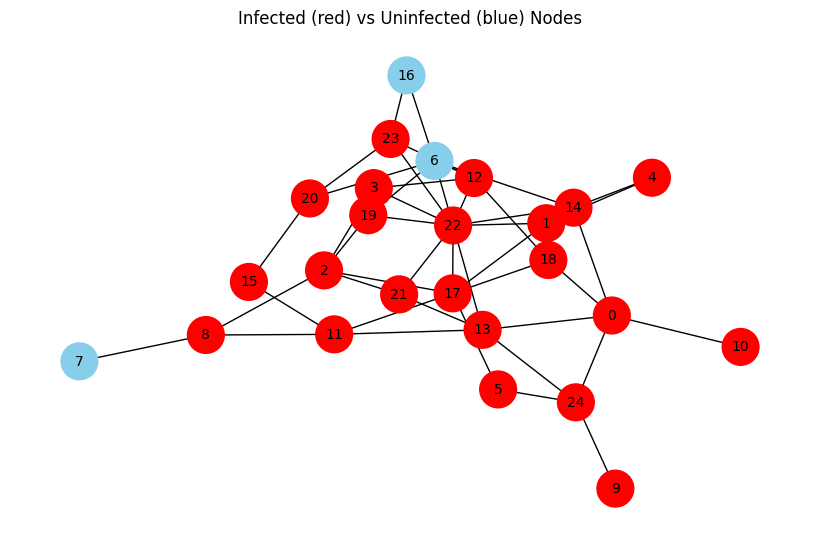

In [112]:
# Assign labels after infection simulation
for node in G.nodes:
    if G.nodes[node]['infection_time'] != -1:
        lbl[node] = G.nodes[node]['infection_time']
    else:
        lbl[node] = -1  # Not infected

# Print final labels
cnt2 = 0
cnt = 0
temp3 = 10000000
flag = 1
while(temp3 > 0 and flag == 1):
  cnt2+=1
  for node in G.nodes:
    my_dict[node].append(G.nodes[node]['state'])
  flag = 0
  for node in G.nodes:
    if(G.nodes[node]['obv'] == 0):

      if(G.nodes[node]['infection_time'] != -1):
        if((G.nodes[node]['state']*(0.9))/G.degree(node) > 0.0001):
          flag = 1
          cnt = 0
          for neighbor in G.neighbors(node):
            if(G.nodes[neighbor]['infection_time'] != -1):
              cnt += 1
          for neighbor in G.neighbors(node):
            if(G.nodes[neighbor]['infection_time'] != -1 and cnt > 0):
              G.nodes[neighbor]['state'] += ((0.9)*(G.nodes[node]['state']))/cnt
              my_dict[neighbor].append(G.nodes[neighbor]['state'])
          if(cnt > 0):
            G.nodes[node]['reserve_state'] += (0.1)*G.nodes[node]['state']
            G.nodes[node]['state'] = 0
            my_dict[neighbor].append(G.nodes[neighbor]['state'])
            my_dict2[neighbor].append(G.nodes[neighbor]['reserve_state'])
    else:
      if(G.nodes[node]['infection_time'] != -1):
        if((G.nodes[node]['state']*(0.9))/G.degree(node) > 0.0001):
          flag = 1
          cnt = 0
          for neighbor in G.neighbors(node):
            if(G.nodes[neighbor]['infection_time'] != -1 and G.nodes[neighbor]['infection_time'] < G.nodes[node]['infection_time']):
              cnt += 1
          for neighbor in G.neighbors(node):
            if(G.nodes[neighbor]['infection_time'] != -1 and G.nodes[neighbor]['infection_time'] < G.nodes[node]['infection_time'] and cnt > 0):
              G.nodes[neighbor]['state'] += ((0.9)*(G.nodes[node]['state']))/cnt
              my_dict[neighbor].append(G.nodes[neighbor]['state'])
          if(cnt > 0):
            G.nodes[node]['reserve_state'] += (0.1)*G.nodes[node]['state']
            G.nodes[node]['state'] = 0
            my_dict[neighbor].append(G.nodes[neighbor]['state'])
            my_dict2[neighbor].append(G.nodes[neighbor]['reserve_state'])
    temp3-=1


for node in G.nodes:
    print(node , " " , " node " ,G.nodes[node]['state'], " state ", G.nodes[node]['infection_time'], " ", " time ")

print("state value")
for node in G.nodes:
  average = sum(my_dict[node]) / len(my_dict[node])
  print(node, " node " , average, " average ")

print("reserved state value")
for node in G.nodes:
  print(node , " " , " node " ,G.nodes[node]['reserve_state'], " reserve_state ")


print(source_nodes)
print(observers)
print("total itrs are: ", cnt2)
# Optional: visualize infected vs uninfected
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G, seed=42)
node_colors = ['red' if lbl[n] != -1 else 'skyblue' for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10)
plt.title("Infected (red) vs Uninfected (blue) Nodes")
plt.show()

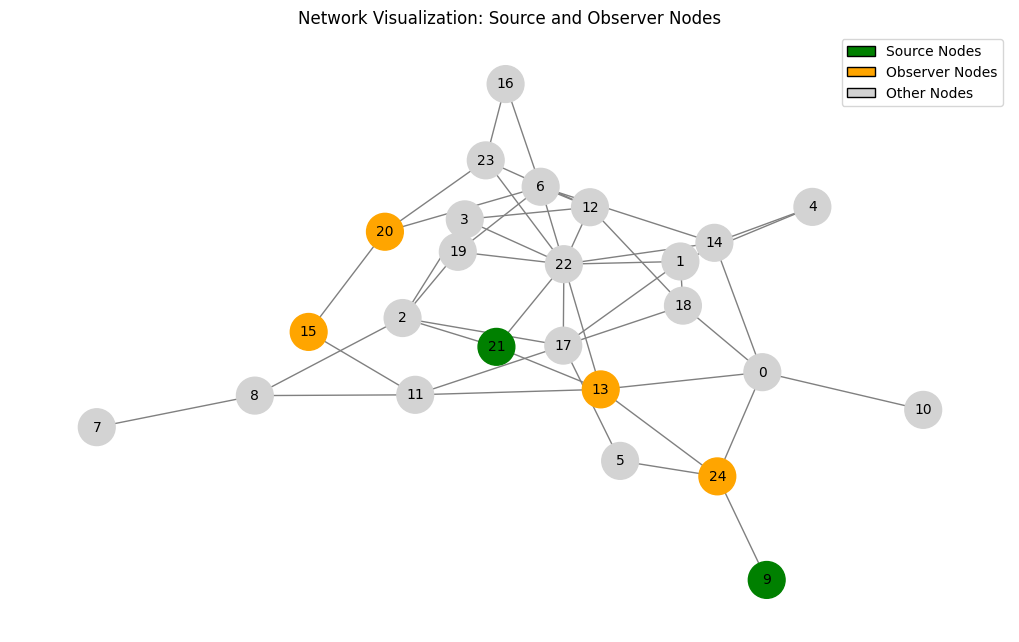

In [113]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch

# Visualization: highlight source_nodes and observers
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# Determine node colors
node_colors = []
for node in G.nodes:
    if node in source_nodes:
        node_colors.append('green')       # Source nodes
    elif node in observers:
        node_colors.append('orange')      # Observer nodes
    else:
        node_colors.append('lightgray')   # All other nodes

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=700, font_size=10)

# Legend
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Source Nodes'),
    Patch(facecolor='orange', edgecolor='black', label='Observer Nodes'),
    Patch(facecolor='lightgray', edgecolor='black', label='Other Nodes')
]
plt.legend(handles=legend_elements, loc='best')
plt.title("Network Visualization: Source and Observer Nodes")
plt.show()


reserve state based source

In [114]:
for obv in observers:
    G.nodes[obv]['obv'] = 1


Top 2 potential sources based on reserve_state:
Node 22 - Reserve State: 2.478517568312115
Node 21 - Reserve State: 2.3301959104563275

Reserve_state_based_source list:
['22', '21']


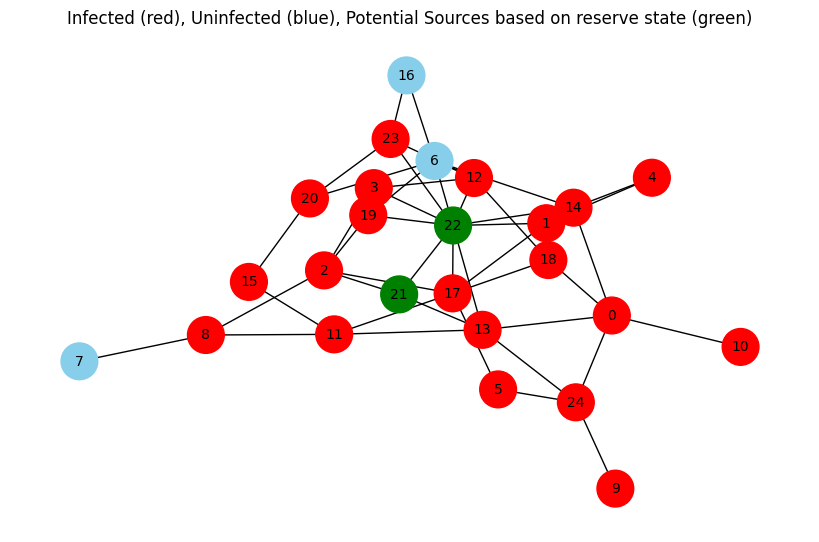

In [115]:
# Define the number of potential sources you want to label
n = total_sources  # You can change this value as needed

# Find candidates that are not observers
non_observer_nodes = [node for node in G.nodes if G.nodes[node]['obv'] == 0]

# Sort the non-observer nodes based on reserve_state in descending order
sorted_candidates = sorted(non_observer_nodes, key=lambda x: G.nodes[x]['reserve_state'], reverse=True)

# Create and store top-n potential sources
Reserve_state_based_source = sorted_candidates[:n]

# Label top n nodes as potential_source
for i in range(min(n, len(sorted_candidates))):
    G.nodes[sorted_candidates[i]]['potential_source'] = 1
else:
    for i in range(n, len(sorted_candidates)):
        G.nodes[sorted_candidates[i]]['potential_source'] = 0

# Print out the selected potential sources
print(f"\nTop {n} potential sources based on reserve_state:")
for node in Reserve_state_based_source:
    print(f"Node {node} - Reserve State: {G.nodes[node]['reserve_state']}")

# Also print the list directly
print("\nReserve_state_based_source list:")
print(Reserve_state_based_source)

# Optional: Visualize potential sources
plt.figure(figsize=(8, 5))
node_colors = []
for node in G.nodes:
    if G.nodes[node].get('potential_source', 0) == 1:
        node_colors.append('green')  # Potential sources in green
    elif lbl[node] != -1:
        node_colors.append('red')    # Infected nodes in red
    else:
        node_colors.append('skyblue')  # Others in blue

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10)
plt.title("Infected (red), Uninfected (blue), Potential Sources based on reserve state (green)")
plt.show()


State based source



Top 2 state-based sources based on node state:
Node 0 - State: 0.0004992976013936686
Node 17 - State: 0.000469144234772976

State_based_source list:
['0', '17']


C:\Users\parva\AppData\Local\Temp\ipykernel_24808\3226820279.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


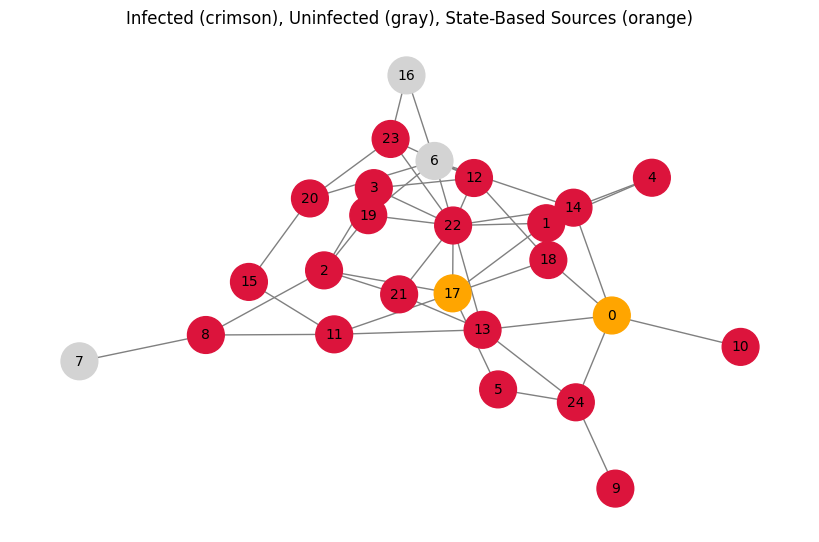

In [116]:
import networkx as nx
import matplotlib.pyplot as plt

# Ensure all node IDs in the graph are strings
G = nx.relabel_nodes(G, lambda x: str(x))

# Number of state-based sources to label
n = total_sources  # You can change this value

# Find candidates that are not observers
non_observer_nodes = [node for node in G.nodes if G.nodes[node].get('obv', 0) == 0]

# Sort the non-observer nodes by their 'state' attribute in descending order
sorted_candidates = sorted(non_observer_nodes, key=lambda x: G.nodes[x]['state'], reverse=True)

# Select top-n candidates as state-based sources
State_based_source = sorted_candidates[:n]

# Label them in the graph
for i, node in enumerate(sorted_candidates):
    G.nodes[node]['state_based_source'] = 1 if i < n else 0

# Print selected sources
print(f"\nTop {n} state-based sources based on node state:")
for node in State_based_source:
    print(f"Node {node} - State: {G.nodes[node]['state']}")

print("\nState_based_source list:")
print(State_based_source)

# Positioning for visualization
pos = nx.spring_layout(G, seed=42)  # Use consistent layout

# Assign colors based on node roles
node_colors = []
for node in G.nodes:
    if G.nodes[node].get('state_based_source', 0) == 1:
        node_colors.append('orange')       # State-based sources
    elif lbl[node] != -1:
        node_colors.append('crimson')      # Infected
    else:
        node_colors.append('lightgray')    # Others

# Draw graph
plt.figure(figsize=(8, 5))
nx.draw(
    G, pos, with_labels=True,
    node_color=node_colors,
    node_size=700,
    font_size=10,
    font_color='black',
    edge_color='gray'
)

plt.title("Infected (crimson), Uninfected (gray), State-Based Sources (orange)", fontsize=12)
plt.tight_layout()
plt.show()


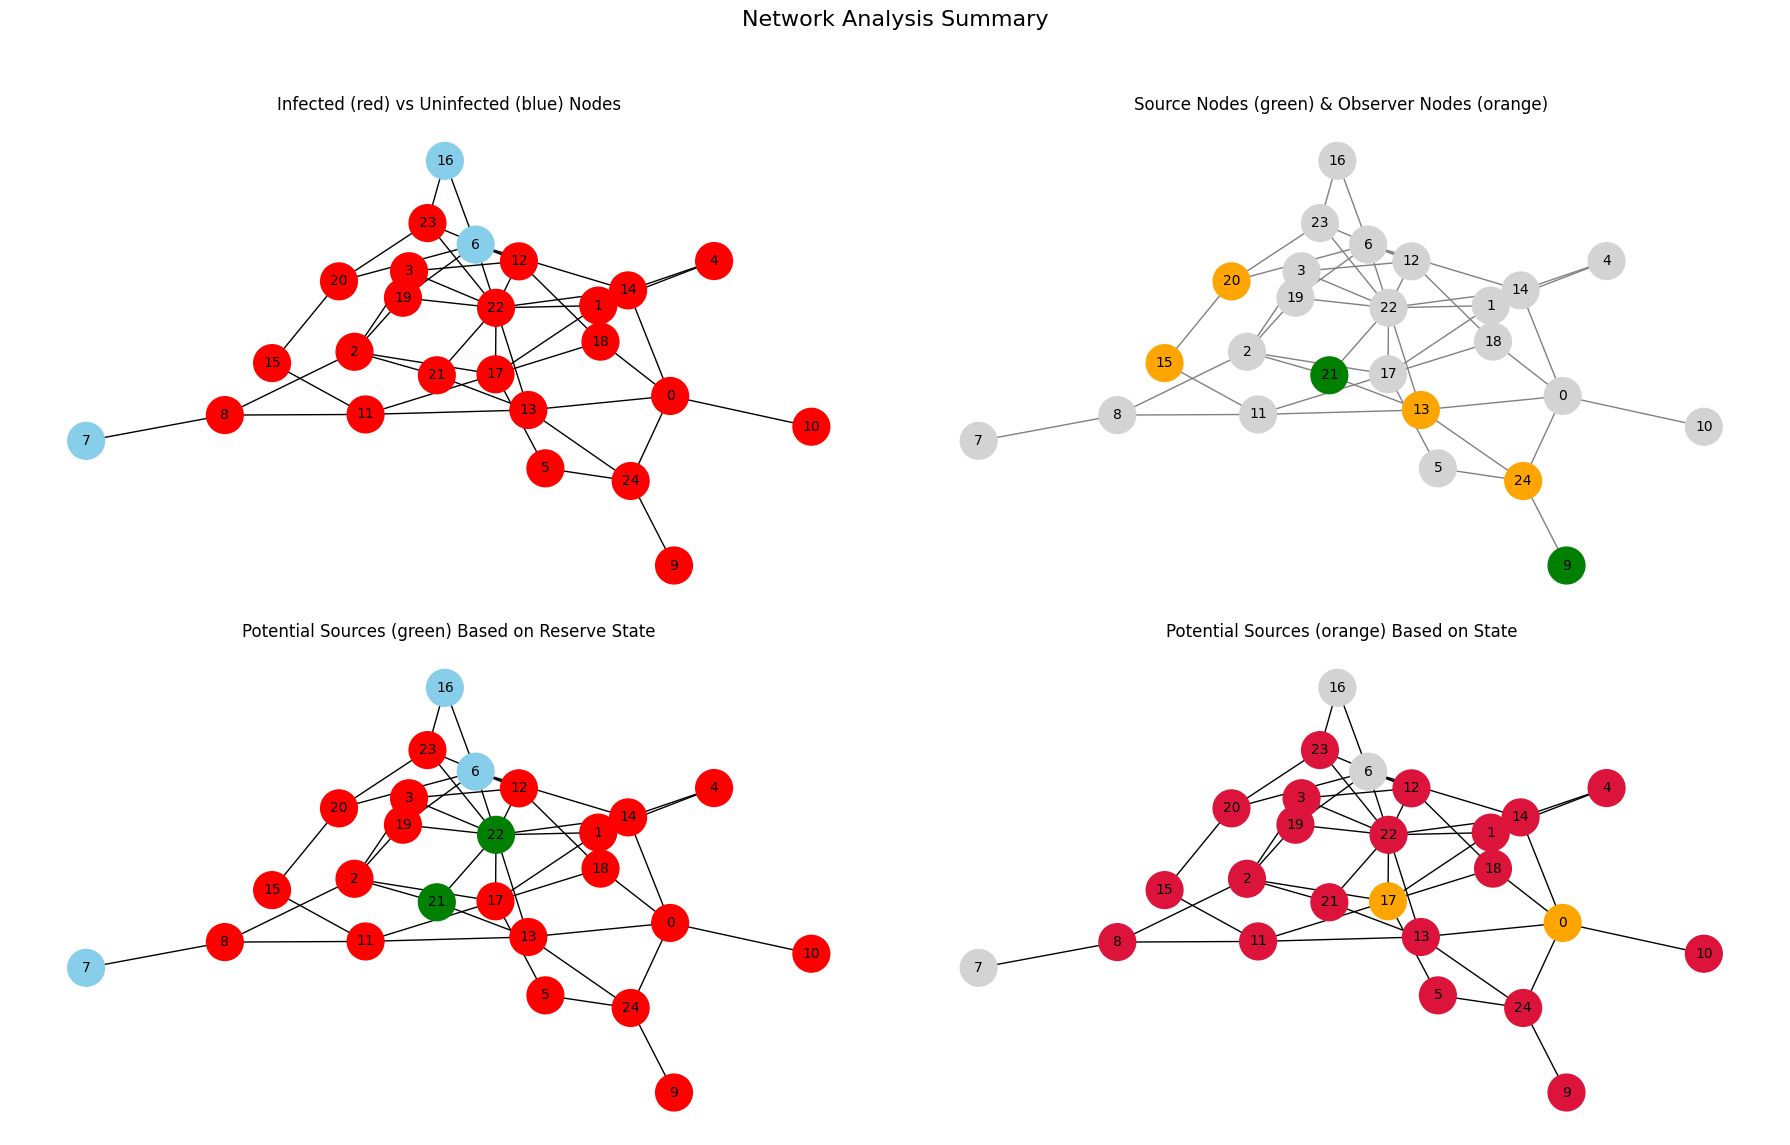

In [117]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch

# Create subplots in a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Network Analysis Summary", fontsize=16)

# Use the same layout for all subplots
pos = nx.spring_layout(G, seed=42)

# --------- Top Left: Infected vs Uninfected ----------
node_colors_1 = ['red' if lbl[n] != -1 else 'skyblue' for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors_1, node_size=700, font_size=10, ax=axs[0, 0])
axs[0, 0].set_title("Infected (red) vs Uninfected (blue) Nodes")

# --------- Top Right: Source and Observer Nodes ----------
node_colors_2 = []
for node in G.nodes:
    if node in source_nodes:
        node_colors_2.append('green')       # Source nodes
    elif node in observers:
        node_colors_2.append('orange')      # Observer nodes
    else:
        node_colors_2.append('lightgray')   # All other nodes
nx.draw(G, pos, with_labels=True, node_color=node_colors_2, edge_color='gray',
        node_size=700, font_size=10, ax=axs[0, 1])
axs[0, 1].set_title("Source Nodes (green) & Observer Nodes (orange)")

# --------- Bottom Left: Reserve State Based Sources ----------
node_colors_3 = []
for node in G.nodes:
    if G.nodes[node].get('potential_source', 0) == 1:
        node_colors_3.append('green')  # Potential sources in green
    elif lbl[node] != -1:
        node_colors_3.append('red')    # Infected nodes in red
    else:
        node_colors_3.append('skyblue')  # Others in blue
nx.draw(G, pos, with_labels=True, node_color=node_colors_3, node_size=700, font_size=10, ax=axs[1, 0])
axs[1, 0].set_title("Potential Sources (green) Based on Reserve State")

# --------- Bottom Right: State Based Sources ----------
node_colors_4 = []
for node in G.nodes:
    if G.nodes[node].get('state_based_source', 0) == 1:
        node_colors_4.append('orange')      # Potential sources in orange
    elif lbl[node] != -1:
        node_colors_4.append('crimson')     # Infected nodes in crimson
    else:
        node_colors_4.append('lightgray')   # Others in light gray
nx.draw(G, pos, with_labels=True, node_color=node_colors_4, node_size=700, font_size=10, ax=axs[1, 1])
axs[1, 1].set_title("Potential Sources (orange) Based on State")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [118]:
# Ensure both lists have same type (strings)
source_nodes = [str(node) for node in source_nodes]
Reserve_state_based_source = [str(node) for node in Reserve_state_based_source]

# 1. Find common and uncommon elements
common_sources_reservebased = list(set(source_nodes) & set(Reserve_state_based_source))
uncommon_source_nodes = list(set(source_nodes) - set(common_sources_reservebased))
uncommon_reserve_sources = list(set(Reserve_state_based_source) - set(common_sources_reservebased))

# 2. Print the lists
print("Common sources:", common_sources_reservebased)
print("Uncommon source_nodes:", uncommon_source_nodes)
print("Uncommon Reserve_state_based_source:", uncommon_reserve_sources)

# 3. Path calculations (between original source_nodes and Reserve_state_based_source)
print("\nPath Calculations:")
for i in uncommon_source_nodes:
    for j in uncommon_reserve_sources:
        print("\nsource:", i, "target:", j)
        try:
            path = nx.shortest_path(G, source=i, target=j)
            print("Path:", path)
            path_length = len(path) - 1
        except nx.NetworkXNoPath:
            print(f"No path between {i} and {j}")
            path_length = float('inf')

        print("Path length:", path_length)


Common sources: ['21']
Uncommon source_nodes: ['9']
Uncommon Reserve_state_based_source: ['22']

Path Calculations:

source: 9 target: 22
Path: ['9', '24', '13', '22']
Path length: 3


In [119]:
import matplotlib.pyplot as plt
import networkx as nx

B = nx.Graph()
B.add_nodes_from(uncommon_source_nodes, bipartite=0)
B.add_nodes_from(uncommon_reserve_sources, bipartite=1)

edge_colors = []
edge_labels = {}

for i in uncommon_source_nodes:
    for j in uncommon_reserve_sources:
        try:
            wt = len(nx.shortest_path(G, source=str(i), target=str(j))) - 1
            edge_colors.append('black')
        except nx.NetworkXNoPath:
            print(f"No path between {i} and {j}, setting weight to 'inf'")
            wt = float('inf')
            edge_colors.append('red')
        B.add_edge(str(i), str(j), weight=wt)
        edge_labels[(str(i), str(j))] = wt





In [ ]:
matching = nx.algorithms.matching.min_weight_matching(B, weight='weight')

# Extract actual weights of the matching
total_weight = 0
for u, v in matching:
    # Ensure consistent node order (optional)
    weight = B[u][v]['weight']
    print(f"Matched: {u} - {v}, weight = {weight}")
    total_weight += weight

print(f"Total matching weight: {total_weight}")
print(f"average matching weight: {total_weight/len(source_nodes)}")

Reserve_state_based_matching = total_weight/len(source_nodes)

Matched: 22 - 9, weight = 3
Total matching weight: 3
average matching weight: 1.5


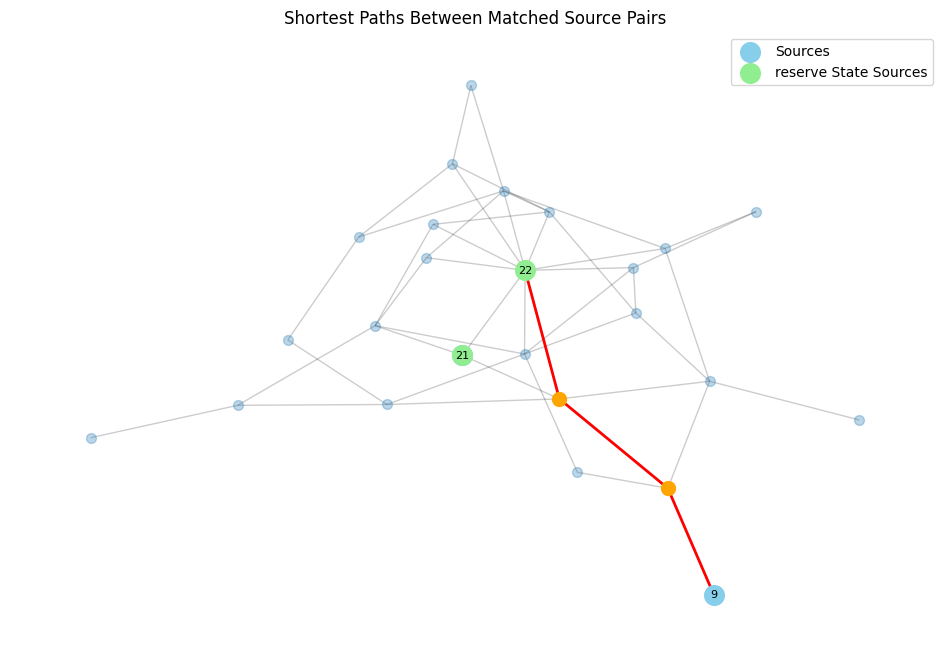

In [121]:
plt.figure(figsize=(12, 8))

# Draw full graph faintly in background
pos_main = nx.spring_layout(G, seed=42)
nx.draw_networkx_edges(G, pos_main, alpha=0.2)
nx.draw_networkx_nodes(G, pos_main, node_size=50, alpha=0.3)

# Draw matched paths
for u, v in matching:
    try:
        path = nx.shortest_path(G, source=u, target=v)
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos_main, edgelist=path_edges, edge_color='red', width=2)
        nx.draw_networkx_nodes(G, pos_main, nodelist=path, node_color='orange', node_size=100)
    except nx.NetworkXNoPath:
        pass  # Skip if no path exists

# Highlight source and state nodes
nx.draw_networkx_nodes(G, pos_main, nodelist=source_nodes, node_color='skyblue', node_size=200, label='Sources')
nx.draw_networkx_nodes(G, pos_main, nodelist=Reserve_state_based_source, node_color='lightgreen', node_size=200, label='reserve State Sources')
nx.draw_networkx_labels(G, pos_main, labels={node: node for node in source_nodes + Reserve_state_based_source}, font_size=8)

plt.title("Shortest Paths Between Matched Source Pairs")
plt.axis('off')
plt.legend()
plt.show()

In [122]:
source_nodes
State_based_source

for i in source_nodes:
    for j in State_based_source:
        print("source", i, j)
        try:
            path = nx.shortest_path(G, source=i, target=j)
            print(path)
            path_length = len(path) - 1
        except nx.NetworkXNoPath:
            print(f"No path between {i} and {j}")
            path_length = float('inf')  # or use 'inf' if you want a string

        print(path_length)


source 9 0
['9', '24', '0']
2
source 9 17
['9', '24', '5', '17']
3
source 21 0
['21', '13', '0']
2
source 21 17
['21', '2', '17']
2


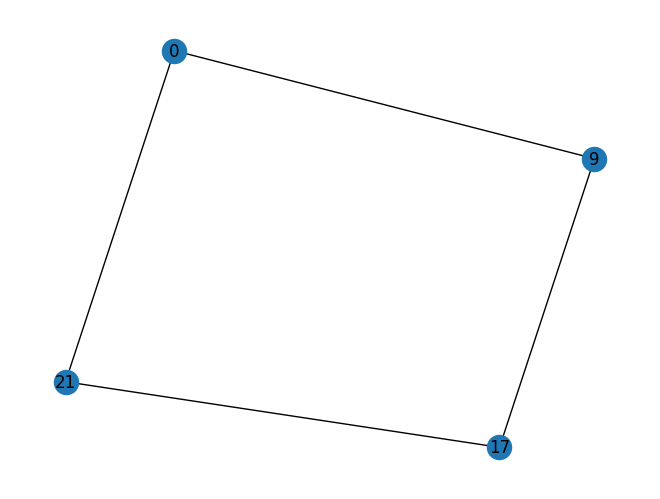

In [123]:
B = nx.Graph()
B.add_nodes_from(source_nodes, bipartite=0)
B.add_nodes_from(State_based_source, bipartite=1)

edge_colors = []
edge_labels = {}

for i in source_nodes:
    for j in State_based_source:
        try:
            wt = len(nx.shortest_path(G, source=str(i), target=str(j))) - 1
            edge_colors.append('black')
        except nx.NetworkXNoPath:
            print(f"No path between {i} and {j}, setting weight to 'inf'")
            wt = float('inf')
            edge_colors.append('red')
        B.add_edge(str(i), str(j), weight=wt)
        edge_labels[(str(i), str(j))] = wt

nx.draw(B,with_labels = True)




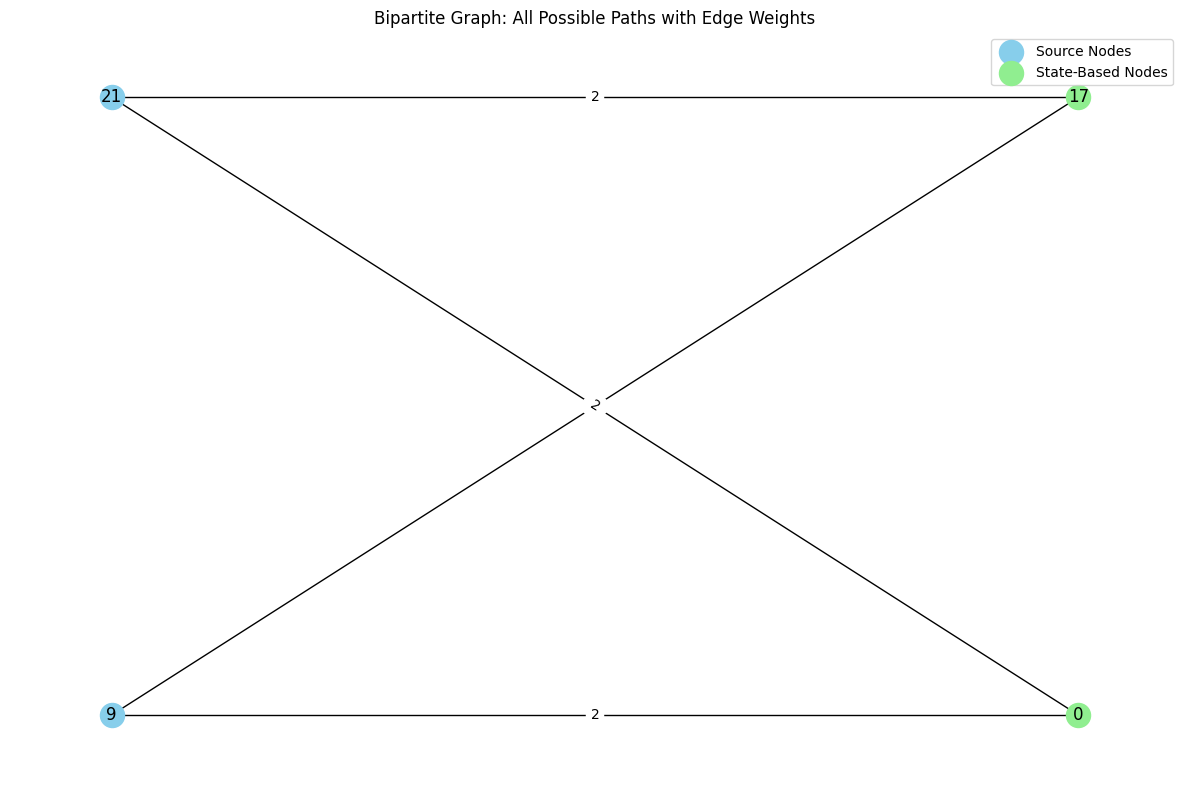

In [124]:
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Step 1: Generate bipartite layout
pos = dict()
pos.update((node, (0, i)) for i, node in enumerate(source_nodes))  # Left side (x=0)
pos.update((node, (1, i)) for i, node in enumerate(State_based_source))  # Right side (x=1)

# Step 2: Draw nodes
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(B, pos, nodelist=source_nodes, node_color='skyblue', label='Source Nodes')
nx.draw_networkx_nodes(B, pos, nodelist=State_based_source, node_color='lightgreen', label='State-Based Nodes')

# Step 3: Draw edges with colors
nx.draw_networkx_edges(B, pos, edge_color=edge_colors)

# Step 4: Add labels to edges
filtered_edge_labels = {
    (u, v): f"{w:.0f}" if w != float('inf') else '∞'
    for (u, v), w in edge_labels.items()
}
nx.draw_networkx_edge_labels(B, pos, edge_labels=filtered_edge_labels, font_color='black')

# Step 5: Node labels
nx.draw_networkx_labels(B, pos)

plt.title("Bipartite Graph: All Possible Paths with Edge Weights")
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()


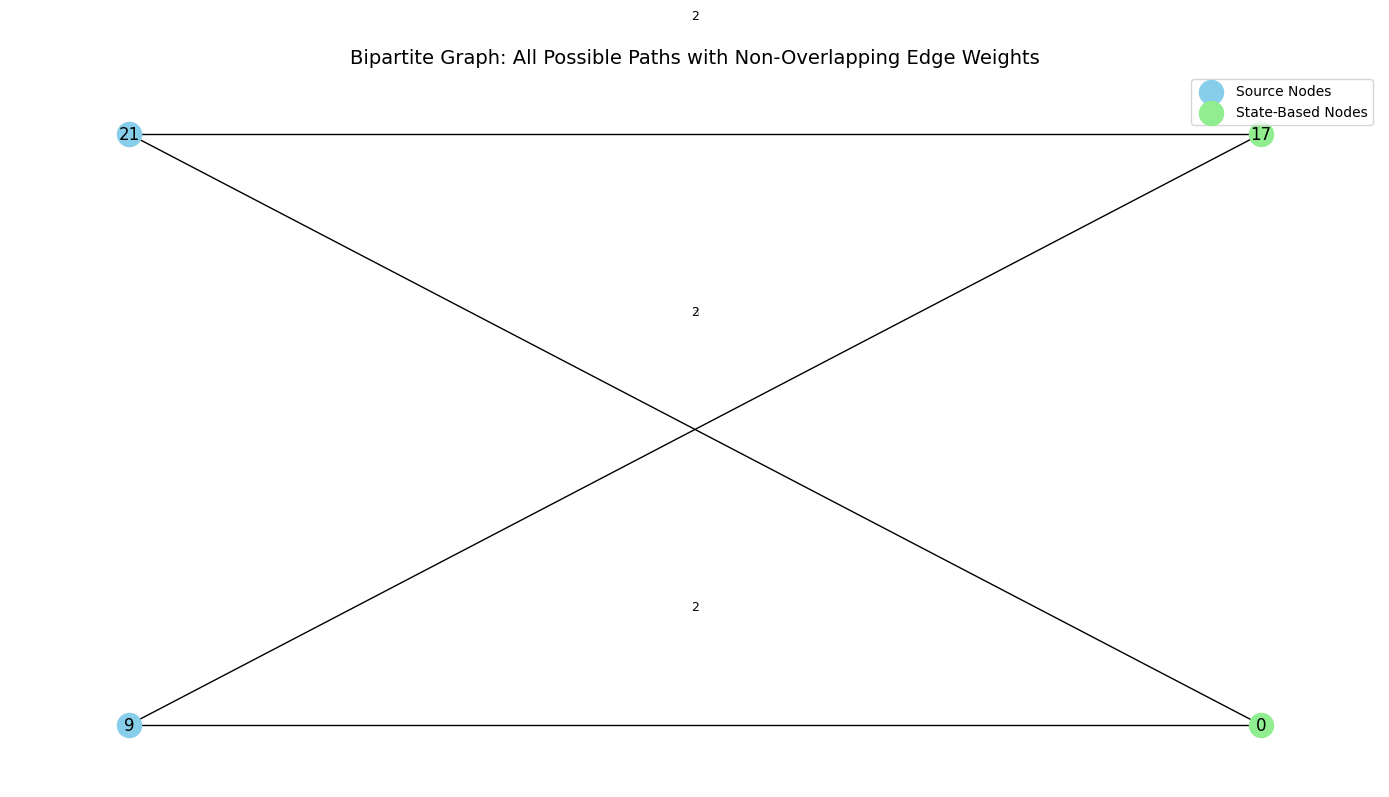

In [125]:
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Step 1: Generate bipartite layout
pos = dict()
pos.update((node, (0, i)) for i, node in enumerate(source_nodes))  # Left side (x=0)
pos.update((node, (1, i)) for i, node in enumerate(State_based_source))  # Right side (x=1)

# Step 2: Plot setup
fig, ax = plt.subplots(figsize=(14, 8))

# Draw nodes
nx.draw_networkx_nodes(B, pos, nodelist=source_nodes, node_color='skyblue', label='Source Nodes', ax=ax)
nx.draw_networkx_nodes(B, pos, nodelist=State_based_source, node_color='lightgreen', label='State-Based Nodes', ax=ax)

# Draw edges
nx.draw_networkx_edges(B, pos, edge_color=edge_colors, ax=ax)

# Draw node labels
nx.draw_networkx_labels(B, pos, ax=ax)

# Step 3: Manually draw edge labels with offset to reduce overlapping
for (u, v), weight in edge_labels.items():
    if weight == float('inf'):
        label = '∞'
    else:
        label = f"{int(weight)}"
    
    # Get position of the edge midpoint and offset it slightly
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    x = (x1 + x2) / 2
    y = (y1 + y2) / 2 + 0.2  # slight vertical offset

    ax.text(x, y, label, fontsize=9, color='black', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Final touches
plt.title("Bipartite Graph: All Possible Paths with Non-Overlapping Edge Weights", fontsize=14)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()


In [126]:
# from sknetwork.data import movie_actor
# from sknetwork.visualization import svg_graph

# # Load a sample bipartite graph (biadjacency matrix)
# biadjacency = movie_actor()

# # Plot the bipartite graph, displaying edge weights
# image = svg_graph(
#     biadjacency,
#     display_edge_weight=True,  # Show edge weights via edge widths
#     edge_width=2,              # Base edge width
#     font_size=12,              # Font size for node labels
#     display_edges=True         # Show edges
# )

# # To display the SVG image in a Jupyter notebook:
# from IPython.display import SVG, display
# display(SVG(image))

In [127]:
matching = nx.algorithms.matching.min_weight_matching(B, weight='weight')

# Extract actual weights of the matching
total_weight = 0
for u, v in matching:
    # Ensure consistent node order (optional)
    weight = B[u][v]['weight']
    print(f"Matched: {u} - {v}, weight = {weight}")
    total_weight += weight

print(f"Total matching weight: {total_weight}")
print(f"average matching weight: {total_weight/2}")

Matched: 0 - 9, weight = 2
Matched: 21 - 17, weight = 2
Total matching weight: 4
average matching weight: 2.0


In [128]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 0: Ensure consistent types (strings)
source_nodes = [str(node) for node in source_nodes]
State_based_source = [str(node) for node in State_based_source]

# Step 1: Find common and uncommon elements
common_sources_statebased = list(set(source_nodes) & set(State_based_source))
uncommon_source_nodes = list(set(source_nodes) - set(common_sources_statebased))
uncommon_state_sources = list(set(State_based_source) - set(common_sources_statebased))

print(" Common sources:", common_sources_statebased)
print(" Uncommon source_nodes:", uncommon_source_nodes)
print(" Uncommon State_based_source:", uncommon_state_sources)

# Step 2: Shortest path analysis between all source and state source nodes
print("\n Path Calculations:")
for i in source_nodes:
    for j in State_based_source:
        print("\nsource:", i, "target:", j)
        try:
            path = nx.shortest_path(G, source=i, target=j)
            print("Path:", path)
            path_length = len(path) - 1
        except nx.NetworkXNoPath:
            print(f"No path between {i} and {j}")
            path_length = float('inf')

        print("Path length:", path_length)

# Step 3: Build bipartite graph
B = nx.Graph()
B.add_nodes_from(source_nodes, bipartite=0)
B.add_nodes_from(State_based_source, bipartite=1)

edge_colors = []
edge_labels = {}

for i in source_nodes:
    for j in State_based_source:
        try:
            wt = len(nx.shortest_path(G, source=str(i), target=str(j))) - 1
            edge_colors.append('black')
        except nx.NetworkXNoPath:
            print(f"No path between {i} and {j}, setting weight to 'inf'")
            wt = float('inf')
            edge_colors.append('red')
        B.add_edge(str(i), str(j), weight=wt)
        edge_labels[(str(i), str(j))] = wt

# Step 4: Compute minimum weight matching
matching = nx.algorithms.matching.min_weight_matching(B, weight='weight')

# Step 5: Extract weights
total_weight_state = 0
print("\n Matching:")
for u, v in matching:
    weight = B[u][v]['weight']
    print(f"Matched: {u} - {v}, weight = {weight}")
    total_weight_state += weight

print(f"\nTotal matching weight: {total_weight_state}")
print(f"Average matching weight: { total_weight_state /len(source_nodes)}")


 Common sources: []
 Uncommon source_nodes: ['21', '9']
 Uncommon State_based_source: ['0', '17']

 Path Calculations:

source: 9 target: 0
Path: ['9', '24', '0']
Path length: 2

source: 9 target: 17
Path: ['9', '24', '5', '17']
Path length: 3

source: 21 target: 0
Path: ['21', '13', '0']
Path length: 2

source: 21 target: 17
Path: ['21', '2', '17']
Path length: 2

 Matching:
Matched: 0 - 9, weight = 2
Matched: 21 - 17, weight = 2

Total matching weight: 4
Average matching weight: 2.0


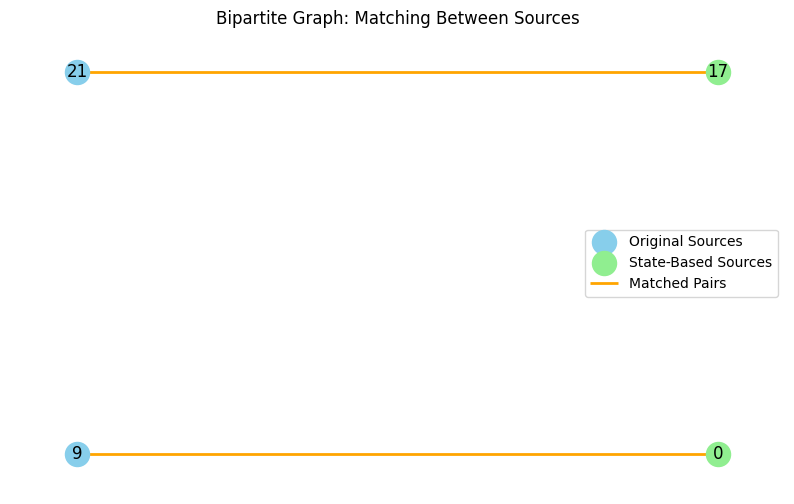

In [129]:
from networkx.algorithms import bipartite

# Position nodes in bipartite layout
pos = dict()
pos.update((node, (1, i)) for i, node in enumerate(source_nodes))  # Left side
pos.update((node, (2, i)) for i, node in enumerate(State_based_source))  # Right side

# Draw nodes
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(B, pos, nodelist=source_nodes, node_color='skyblue', label='Original Sources')
nx.draw_networkx_nodes(B, pos, nodelist=State_based_source, node_color='lightgreen', label='State-Based Sources')

# Draw only matching edges
matching_edges = list(matching)
nx.draw_networkx_edges(B, pos, edgelist=matching_edges, edge_color='orange', width=2, label='Matched Pairs')

# Draw labels
nx.draw_networkx_labels(B, pos)

plt.title("Bipartite Graph: Matching Between Sources")
plt.axis('off')
plt.legend()
plt.show()


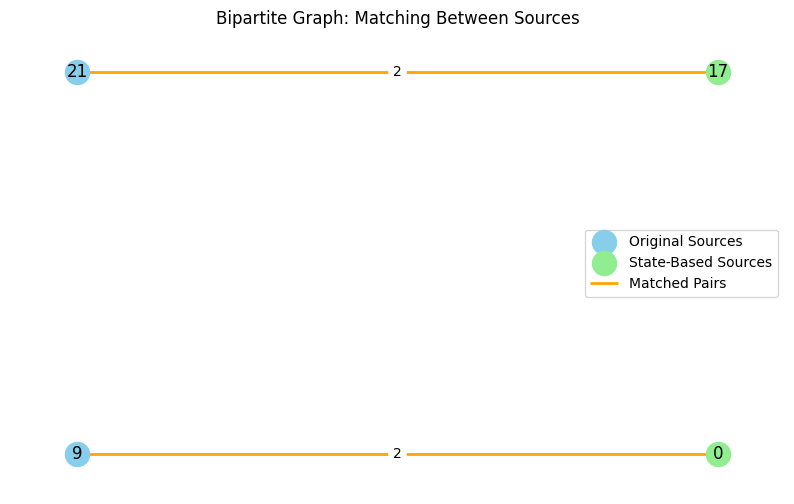

In [130]:
from networkx.algorithms import bipartite

# Position nodes in bipartite layout
pos = dict()
pos.update((node, (1, i)) for i, node in enumerate(source_nodes))  # Left side
pos.update((node, (2, i)) for i, node in enumerate(State_based_source))  # Right side

# Draw nodes
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(B, pos, nodelist=source_nodes, node_color='skyblue', label='Original Sources')
nx.draw_networkx_nodes(B, pos, nodelist=State_based_source, node_color='lightgreen', label='State-Based Sources')

# Draw only matching edges
matching_edges = list(matching)
nx.draw_networkx_edges(B, pos, edgelist=matching_edges, edge_color='orange', width=2, label='Matched Pairs')

# Extract edge weights only for matched edges
matched_edge_labels = {(u, v): B[u][v]['weight'] for u, v in matching}

# Draw edge labels
nx.draw_networkx_edge_labels(B, pos, edge_labels=matched_edge_labels, font_color='black')

# Draw node labels
nx.draw_networkx_labels(B, pos)

plt.title("Bipartite Graph: Matching Between Sources")
plt.axis('off')
plt.legend()
plt.show()


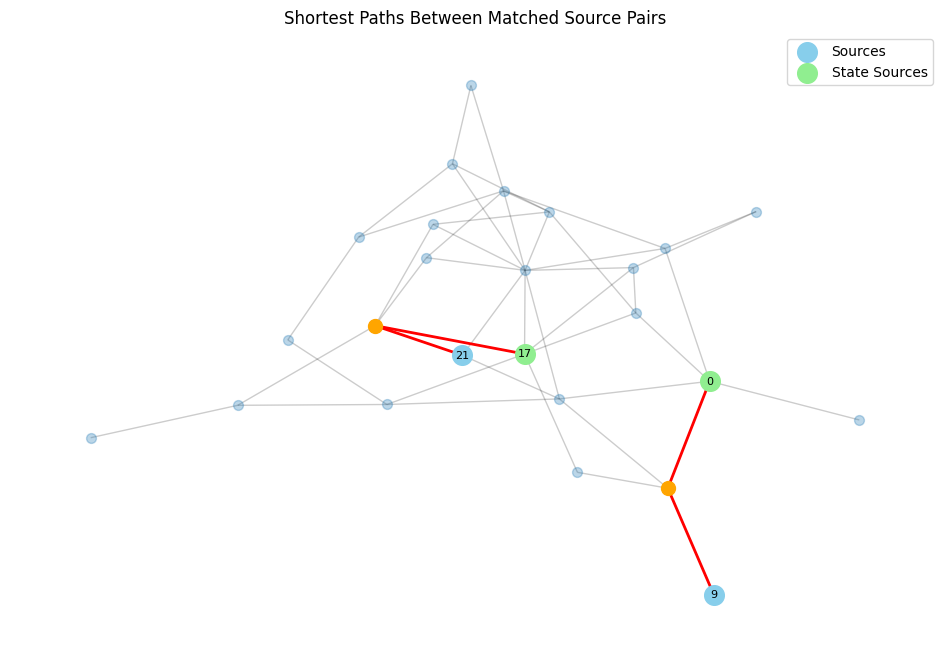

In [131]:
plt.figure(figsize=(12, 8))

# Draw full graph faintly in background
pos_main = nx.spring_layout(G, seed=42)
nx.draw_networkx_edges(G, pos_main, alpha=0.2)
nx.draw_networkx_nodes(G, pos_main, node_size=50, alpha=0.3)

# Draw matched paths
for u, v in matching:
    try:
        path = nx.shortest_path(G, source=u, target=v)
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos_main, edgelist=path_edges, edge_color='red', width=2)
        nx.draw_networkx_nodes(G, pos_main, nodelist=path, node_color='orange', node_size=100)
    except nx.NetworkXNoPath:
        pass  # Skip if no path exists

# Highlight source and state nodes
nx.draw_networkx_nodes(G, pos_main, nodelist=source_nodes, node_color='skyblue', node_size=200, label='Sources')
nx.draw_networkx_nodes(G, pos_main, nodelist=State_based_source, node_color='lightgreen', node_size=200, label='State Sources')
nx.draw_networkx_labels(G, pos_main, labels={node: node for node in source_nodes + State_based_source}, font_size=8)

plt.title("Shortest Paths Between Matched Source Pairs")
plt.axis('off')
plt.legend()
plt.show()


In [132]:
import os
import pandas as pd

# Original path
original_path 

# Get directory and filename without extension
base_dir = os.path.dirname(original_path)
base_name = os.path.splitext(os.path.basename(original_path))[0]
base_dir = os.getcwd() + "/results"
print(base_dir)
print(base_name)
# Create new filename for the final GEXF
final_gexf_path = os.path.join(base_dir, base_name  + "_" +str(len(source_nodes)) + "random_final.gexf")

# Save the graph
nx.write_gexf(G, final_gexf_path)
print(f"Graph saved to: {final_gexf_path}")

# Prepare CSV export
data = []
for node, attrs in G.nodes(data=True):
    row = {'node': node}
    row.update(attrs)
    data.append(row)

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
csv_path = os.path.join(base_dir, base_name + "_" +str(len(source_nodes)) +"random_final_attributes.csv")
graph_name = base_name
df.to_csv(csv_path, index=False)
print(f"Node attributes saved to: {csv_path}")


c:\Users\parva\OneDrive\Desktop\BTP-parva\btp_result_generation\codes\tester_random_visual/results
ER_n25_p0.15_graph_1
Graph saved to: c:\Users\parva\OneDrive\Desktop\BTP-parva\btp_result_generation\codes\tester_random_visual/results\ER_n25_p0.15_graph_1_2random_final.gexf
Node attributes saved to: c:\Users\parva\OneDrive\Desktop\BTP-parva\btp_result_generation\codes\tester_random_visual/results\ER_n25_p0.15_graph_1_2random_final_attributes.csv


In [133]:
import os
import csv

# Assuming these variables already exist from your previous code:
# source_nodes: List of source nodes
# identified_reserve_nodes, avg_weight_reserve, common_reserve: Precomputed for reserve state
# identified_state_nodes, avg_weight_state, common_state: Precomputed for state
# graph_name: The name of the graph

# --- Prepare the row ---
row = [
    graph_name,
    len(source_nodes),
    source_nodes,  # Number of sources
    len(Reserve_state_based_source),
    Reserve_state_based_source,  # Identified (Reserve)
    round(total_weight/len(source_nodes), 3),  # Avg Weight (Reserve)
    len(common_sources_reservebased),
    common_sources_reservebased,  # Common (Reserve)
    len(State_based_source),
    State_based_source,  # Identified (State)
    round(total_weight_state/len(source_nodes), 3),  # Avg Weight (State)
    len(common_sources_statebased),
    common_sources_statebased  # Common (State)
]

# --- Write results to CSV ---
csv_filename = "results_compilation_random.csv"
write_header = not os.path.exists(csv_filename)

with open(csv_filename, mode='a', newline='') as file:
    writer = csv.writer(file)
    if write_header:
        writer.writerow([
            "Graph Name",
            "no of sources",
            "#Sources",
            "no of identefied sources_Reserve(diff from original)",
            "#Identified (Reserve)",
            "Avg Weight (Reserve)",
            "len common reserve",
            "#Common (Reserve)",
            "no of identefied sources_State(diff from original) ",
            "#Identified (State)",
            "Avg Weight (State)",
            "len common state",
            "#Common (State)"
        ])
    writer.writerow(row)

print(f"[✔] Results appended to {csv_filename}")


[✔] Results appended to results_compilation_random.csv
